In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import joblib
import warnings



In [2]:
# Step 1: Load the CSV using ';' as separator
url = 'Data1.csv'
dataset = pd.read_csv(url, sep=';', engine='python')

# Step 3: Strip spaces and fix malformed text
dataset.columns = dataset.columns.str.strip()
dataset = dataset.applymap(lambda x: str(x).replace('\t', '').strip() if isinstance(x, str) else x)
#La fonction lambda en Python sert à créer rapidement une petite fonction anonyme (sans nom), souvent pour une utilisation temporaire.

# Step 4: Display clean dataset
print(dataset.head())


         Date      Time CO(GT)  PT08.S1(CO)  NMHC(GT) C6H6(GT)  PT08.S2(NMHC)  \
0  10/03/2004  18.00.00    2,6       1360.0     150.0     11,9         1046.0   
1  10/03/2004  19.00.00      2       1292.0     112.0      9,4          955.0   
2  10/03/2004  20.00.00    2,2       1402.0      88.0      9,0          939.0   
3  10/03/2004  21.00.00    2,2       1376.0      80.0      9,2          948.0   
4  10/03/2004  22.00.00    1,6       1272.0      51.0      6,5          836.0   

   NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0    166.0        1056.0    113.0        1692.0       1268.0  13,6  48,9   
1    103.0        1174.0     92.0        1559.0        972.0  13,3  47,7   
2    131.0        1140.0    114.0        1555.0       1074.0  11,9  54,0   
3    172.0        1092.0    122.0        1584.0       1203.0  11,0  60,0   
4    131.0        1205.0    116.0        1490.0       1110.0  11,2  59,6   

       AH  Unnamed: 15  Unnamed: 16  
0  0,7578         

1. Exploration des données
(preprocesse)



Analyse des données (mesures, courbes, interprétation)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [4]:
dataset.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


# **Statistique descriptive **

La variance montre la dispersion de chaque variable : plus elle est haute, plus les valeurs varient.

In [5]:
dataset.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),Unnamed: 15,Unnamed: 16
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,0.0,0.0
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032,NaN,NaN
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184,NaN,NaN
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,NaN,NaN
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000,NaN,NaN
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000,NaN,NaN
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,NaN,NaN
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,NaN,NaN


In [6]:
dataset.shape

(9471, 17)

 Identification des anomalies

In [7]:
dataset= dataset.drop(columns=['Unnamed: 15', 'Unnamed: 16'])


In [8]:
dataset.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

3. Nettoyage et prétraitement des données (feature selection incluse)

In [9]:
dataset.dropna(inplace=True)

In [10]:
dataset.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [12]:
def clean_column(df, column_name, convert_to_float=True):
    if column_name in df.columns:
        df[column_name] = (
            df[column_name]
            .astype(str)
            .str.replace(',', '.', regex=False)  # Replace commas with dots
            .str.replace(' ', '', regex=False)   # Remove spaces
        )
        if convert_to_float:
            try:
                df[column_name] = df[column_name].astype(float)
                print(f" Cleaned and converted '{column_name}' to float.")
            except ValueError:
                print(f" Couldn't convert '{column_name}' to float. Non-numeric values remain.")
        else:
            print(f" Cleaned column '{column_name}' (replaced ',' and removed spaces).")
    else:
        print(f"❌ Column '{column_name}' not found in the DataFrame.")

# CO(GT), C6H6(GT), T, RH, AH
clean_column(dataset, 'AH')
clean_column(dataset, 'RH')
clean_column(dataset, 'CO(GT)')
clean_column(dataset, 'C6H6(GT)')
clean_column(dataset, 'T')

 Cleaned and converted 'AH' to float.
 Cleaned and converted 'RH' to float.
 Cleaned and converted 'CO(GT)' to float.
 Cleaned and converted 'C6H6(GT)' to float.
 Cleaned and converted 'T' to float.


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [14]:
dataset = dataset.drop(columns=['Time', 'Date'])


In [15]:
# Feature Engineer

# Vérification du type et aperçu des valeurs
dataset['CO(GT)'].dtypes, dataset['CO(GT)'].head(10)

(dtype('float64'),
 0    2.6
 1    2.0
 2    2.2
 3    2.2
 4    1.6
 5    1.2
 6    1.2
 7    1.0
 8    0.9
 9    0.6
 Name: CO(GT), dtype: float64)

In [16]:
dataset.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


**Histogrammes des variables numériques**

<Figure size 1500x1200 with 0 Axes>

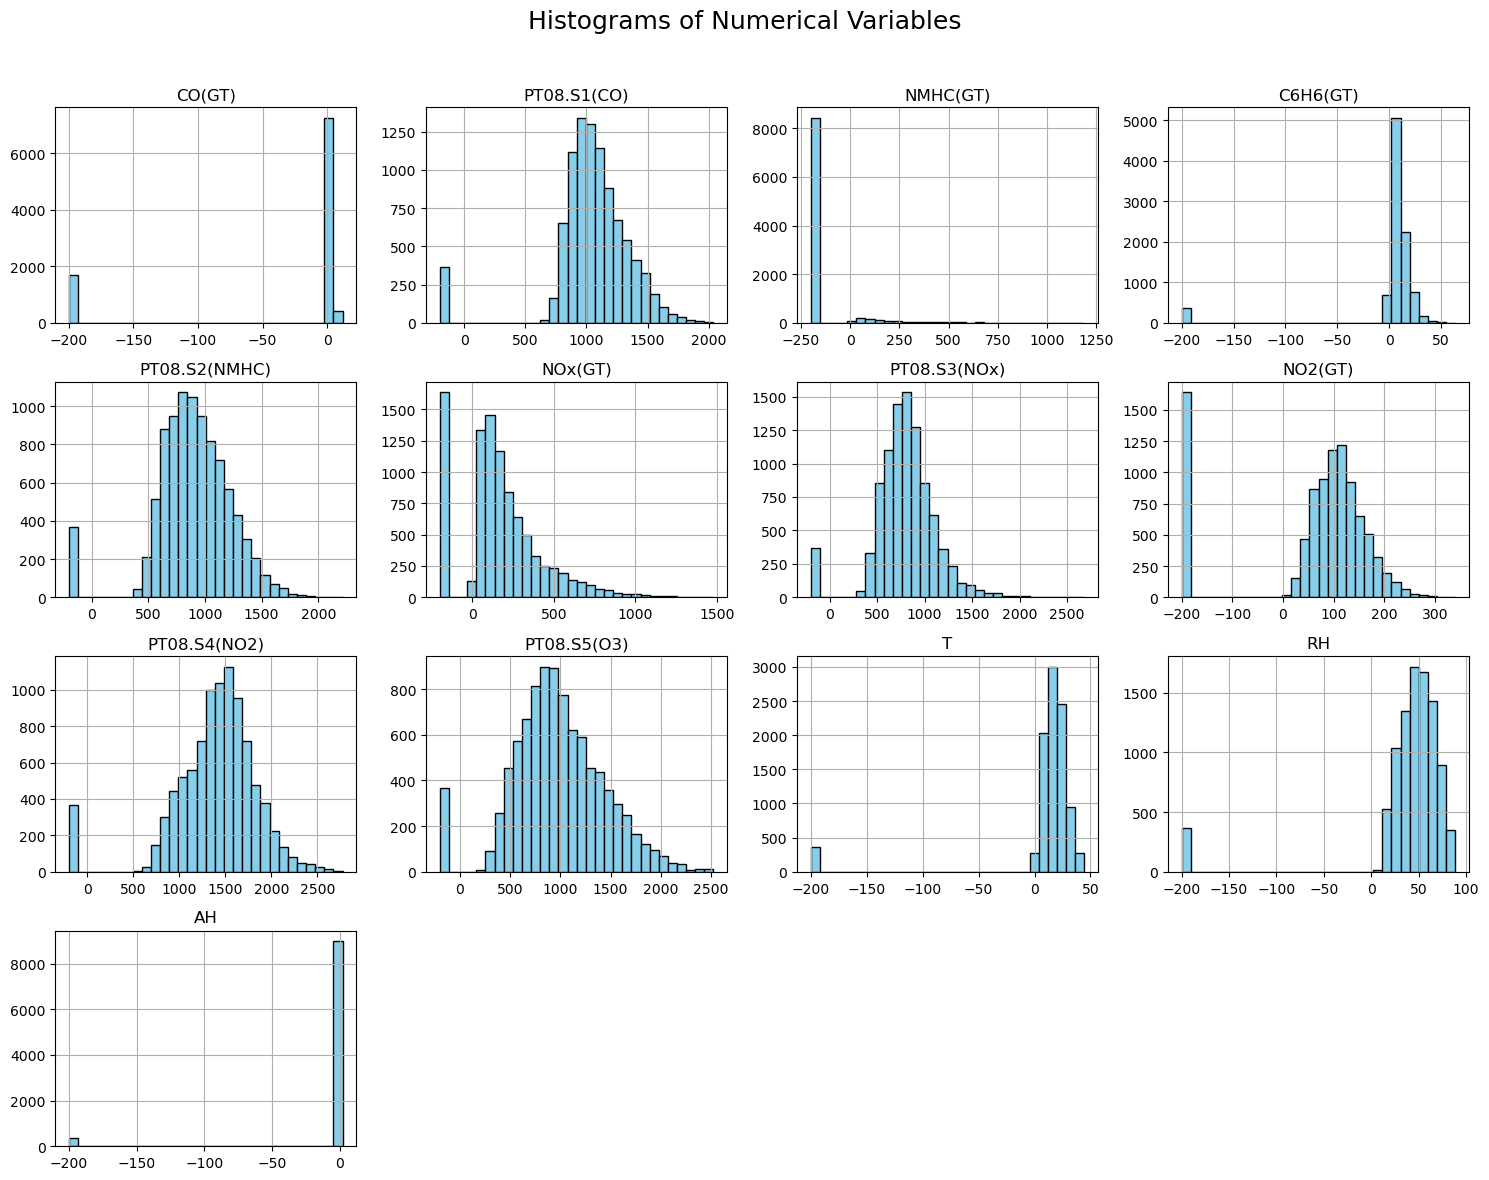

In [17]:
# Select only numeric columns
dataset_hist= dataset.select_dtypes(include='number')

# Create histograms
plt.figure(figsize=(15, 12))
dataset_hist.hist(bins=30, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Variables", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [18]:
# Compter les valeurs égales à -200 pour chaque colonne
count_equal_minus_200 = (dataset == -200).sum()
# Affichage
print("Nombre de valeurs == -200 par colonne :")
print(count_equal_minus_200)


Nombre de valeurs == -200 par colonne :
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


In [19]:
# Nombre total de lignes où au moins une valeur est égale à -200
nombre_lignes_avec_moins_200 = (dataset == -200).any(axis=1).sum()

print(f"Nombre total de lignes contenant au moins une valeur égale à -200 : {nombre_lignes_avec_moins_200}")


Nombre total de lignes contenant au moins une valeur égale à -200 : 8530


In [20]:
# Supprimer la colonne 'NMHC(GT)' si elle existe
if 'NMHC(GT)' in dataset.columns:
    dataset = dataset.drop(columns='NMHC(GT)')
    print("Colonne 'NMHC(GT)' supprimée avec succès.")
else:
    print("La colonne 'NMHC(GT)' n'existe pas dans le DataFrame.")


Colonne 'NMHC(GT)' supprimée avec succès.


In [21]:
# Supprimer toutes les lignes contenant au moins une valeur égale à -200
dataset_best = dataset[~(dataset == -200).any(axis=1)]

# Vérifier la nouvelle taille du DataFrame
print(f"Nombre de lignes restantes : {len(dataset_best)}")


Nombre de lignes restantes : 6941


<Figure size 1500x1200 with 0 Axes>

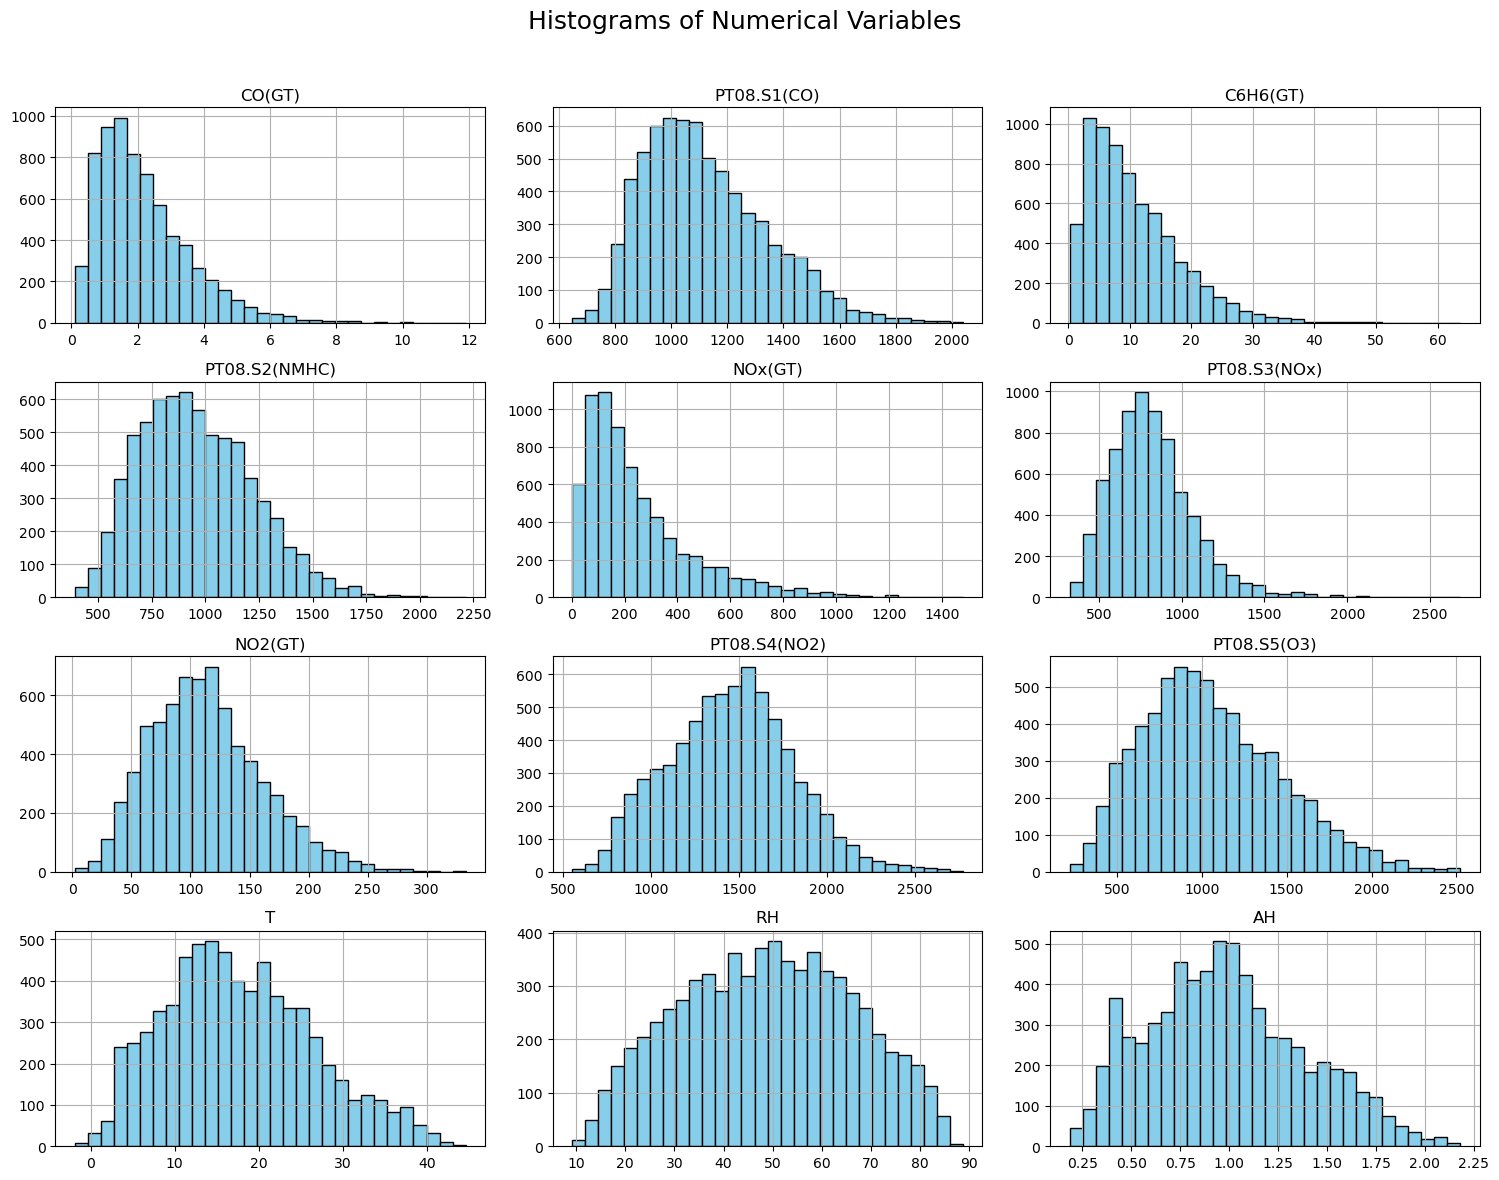

In [22]:
# Select only numeric columns
dataset_best= dataset_best.select_dtypes(include='number')

# Create histograms
plt.figure(figsize=(15, 12))
dataset_best.hist(bins=30, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Variables", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [23]:
dataset_best.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6941 entries, 0 to 9356
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         6941 non-null   float64
 1   PT08.S1(CO)    6941 non-null   float64
 2   C6H6(GT)       6941 non-null   float64
 3   PT08.S2(NMHC)  6941 non-null   float64
 4   NOx(GT)        6941 non-null   float64
 5   PT08.S3(NOx)   6941 non-null   float64
 6   NO2(GT)        6941 non-null   float64
 7   PT08.S4(NO2)   6941 non-null   float64
 8   PT08.S5(O3)    6941 non-null   float64
 9   T              6941 non-null   float64
 10  RH             6941 non-null   float64
 11  AH             6941 non-null   float64
dtypes: float64(12)
memory usage: 704.9 KB


<Figure size 1500x1200 with 0 Axes>

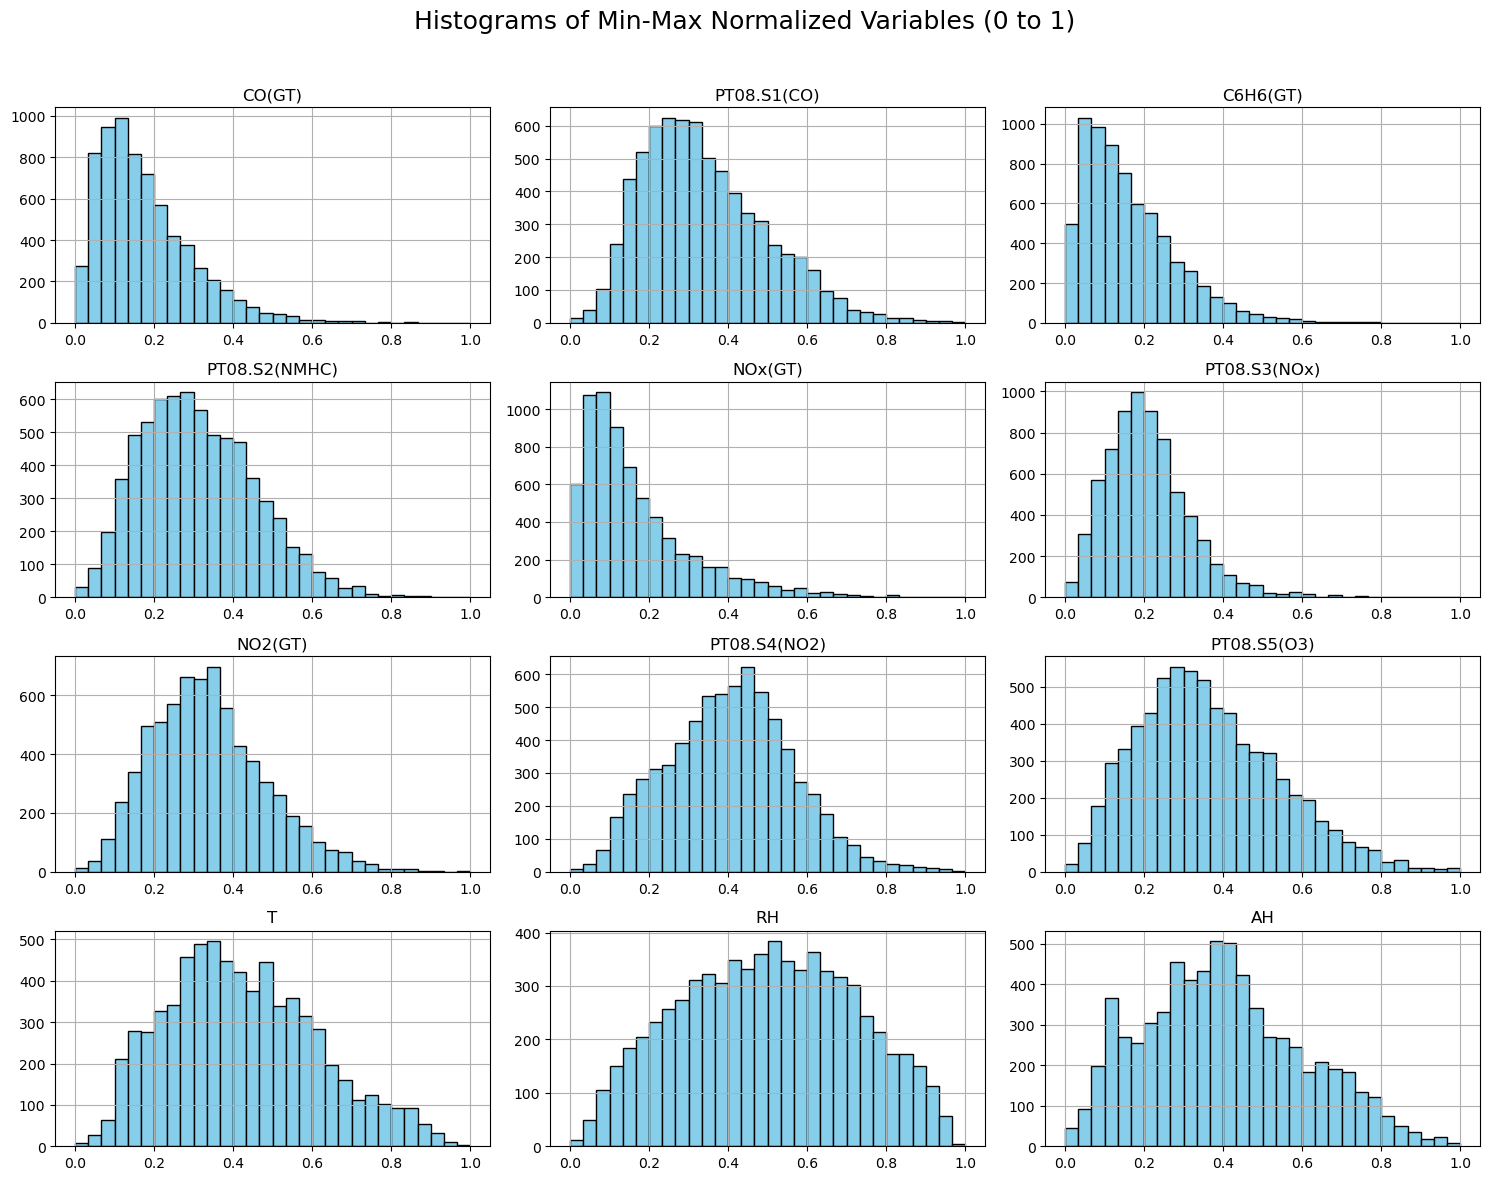

In [24]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

# 1. Garder seulement les colonnes numériques
dataset_best = dataset_best.select_dtypes(include='number')

# 2. Appliquer la normalisation Min-Max
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(dataset_best)

# 3. Créer un DataFrame normalisé avec les mêmes noms de colonnes
dataset_best_normalized1 = pd.DataFrame(normalized_data, columns=dataset_best.columns)

# 4. Afficher les histogrammes
plt.figure(figsize=(15, 12))
dataset_best_normalized1.hist(bins=30, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Min-Max Normalized Variables (0 to 1)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


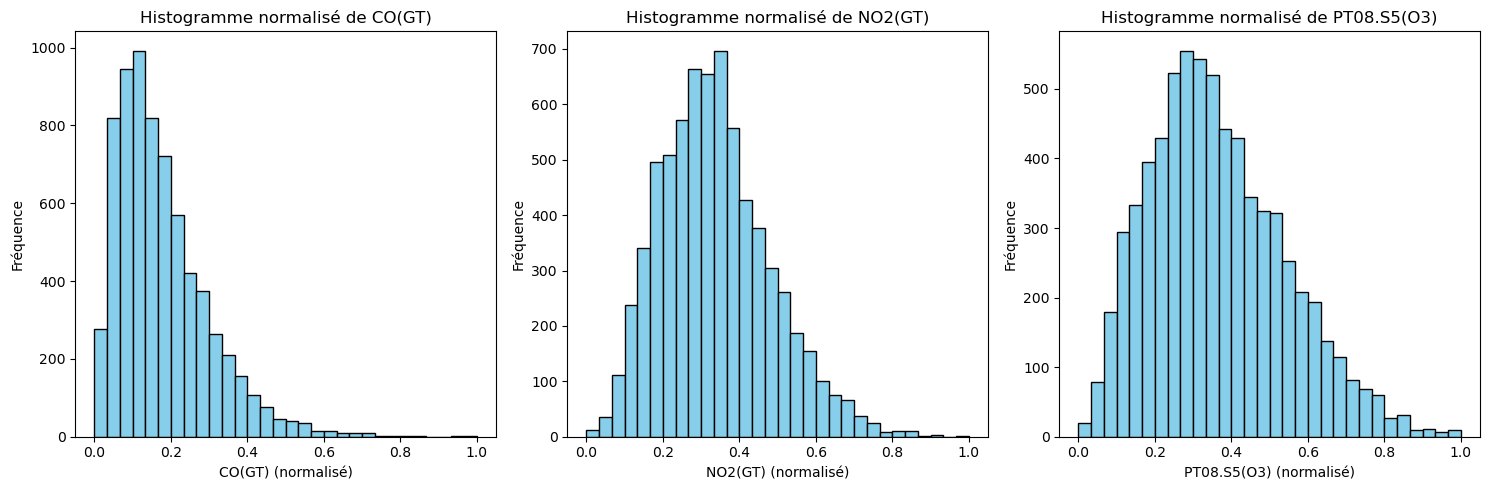

In [25]:

# Sélection des colonnes spécifiques
selected_columns = ['CO(GT)', 'NO2(GT)', 'PT08.S5(O3)']

# Normalisation min-max entre 0 et 1
dataset_best3= dataset_best_normalized1[selected_columns].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Création de l'histogramme pour les 3 variables normalisées
plt.figure(figsize=(15, 5))

for i, col in enumerate(selected_columns, 1):
    plt.subplot(1, 3, i)
    plt.hist(dataset_best3[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogramme normalisé de {col}')
    plt.xlabel(f'{col} (normalisé)')
    plt.ylabel('Fréquence')

plt.tight_layout()
plt.show()


In [26]:
import joblib

# Assuming 'scaler' is your MinMaxScaler object and you want to save it
joblib.dump(scaler, 'minmax_scaler.pkl')

# Example of loading the scaler later
# loaded_scaler = joblib.load('minmax_scaler.joblib')


['minmax_scaler.pkl']

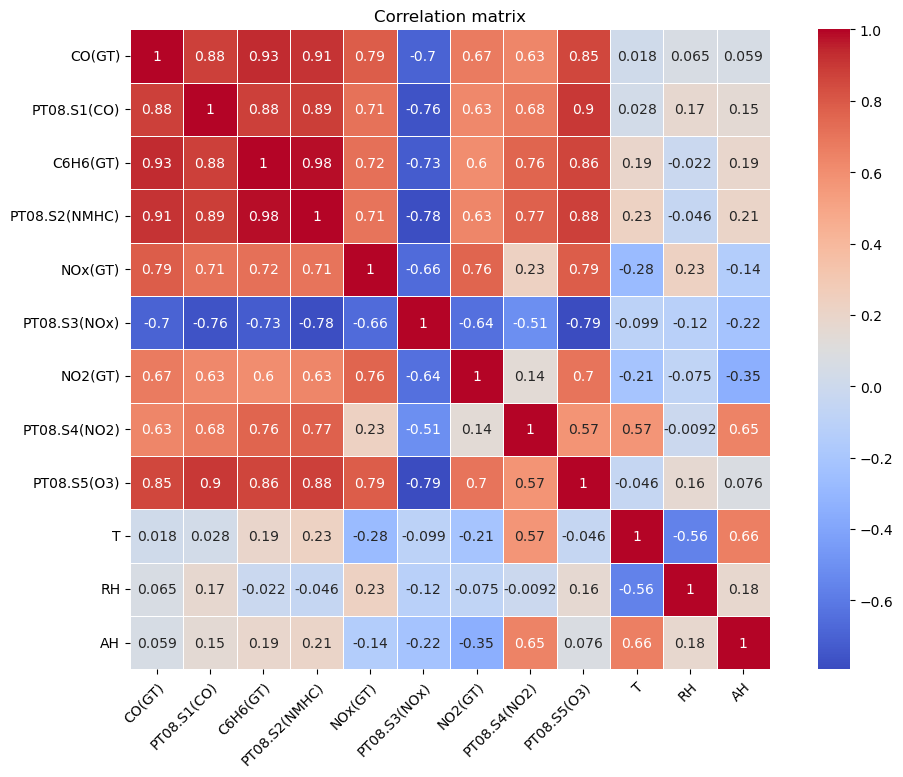

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np  # Import de numpy

# Calcul de la matrice de corrélation
corr = dataset_best_normalized1.corr(numeric_only=True)

# Affichage avec heatmap
plt.figure(figsize=(12, 8))  # Ajuste la taille de la figure pour avoir plus d'espace
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, square=True)

# Ajouter un titre
plt.title("Correlation matrix")

# Espacement des étiquettes des colonnes et lignes
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')  # Rotation des étiquettes en x
plt.yticks(rotation=0)  # Rotation des étiquettes en y

# Ajuster les espaces
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Affichage
plt.show()



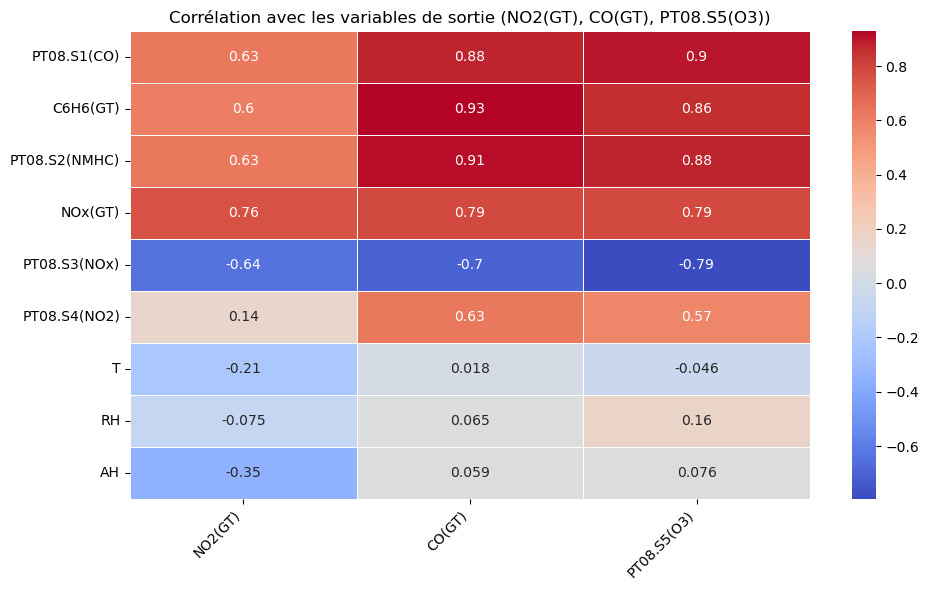

In [28]:
# Liste des variables de sortie
target_vars = ['NO2(GT)', 'CO(GT)', 'PT08.S5(O3)']

# Calcul de la matrice de corrélation sur les colonnes numériques
corr = dataset_best_normalized1.corr(numeric_only=True)

# Extraction des corrélations avec les variables de sortie
corr_target = corr[target_vars].drop(index=target_vars, errors='ignore')  # Supprime les cibles des lignes

# Affichage avec heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_target, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Corrélation avec les variables de sortie (NO2(GT), CO(GT), PT08.S5(O3))")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



In [30]:
# Matrix de corrélation
corr = dataset_best_normalized1.corr(numeric_only=True)

# Sélectionner les features qui ont une corrélation > 0.5 pour chaque cible
features_no2 = corr[abs(corr['NO2(GT)']) > 0.5].index.tolist()
features_co = corr[abs(corr['CO(GT)']) > 0.5].index.tolist()
features_o3 = corr[abs(corr['PT08.S5(O3)']) > 0.5].index.tolist()

# Enlever la cible elle-même des features sélectionnées
features_no2.remove('NO2(GT)')
features_co.remove('CO(GT)')
features_o3.remove('PT08.S5(O3)')

#for i in [features_no2, features_co, features_o3]:
 # i.remove('NO2(GT)')
 # i.remove('CO(GT)')
  #i.remove('PT08.S5(O3)')

print("Features for NO2 prediction:", features_no2)
print("Features for CO prediction:", features_co)
print("Features for O3 prediction:", features_o3)


Features for NO2 prediction: ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'PT08.S5(O3)']
Features for CO prediction: ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
Features for O3 prediction: ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)']


In [31]:
import joblib

print("Features for NO2 prediction:", features_no2)
print("Features for CO prediction:", features_co)
print("Features for O3 prediction:", features_o3)

scaler = MinMaxScaler()
new_df = pd.DataFrame(dataset_best, columns=features_no2)
scaler.fit(new_df)

joblib.dump(scaler, 'scaler_no2.pkl')

scaler = MinMaxScaler()
new_df = pd.DataFrame(dataset_best, columns=features_co)
scaler.fit(new_df)

joblib.dump(scaler, 'scaler_co.pkl')

scaler = MinMaxScaler()
new_df = pd.DataFrame(dataset_best, columns=features_o3)
scaler.fit(new_df)

joblib.dump(scaler, 'scaler_o3.pkl')

Features for NO2 prediction: ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'PT08.S5(O3)']
Features for CO prediction: ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
Features for O3 prediction: ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)']


['scaler_o3.pkl']

In [32]:
from sklearn.model_selection import train_test_split

# Définir les features pour chaque target (à adapter selon ton dataset)
features_no2 = ['CO(GT)','PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'PT08.S5(O3)']
features_co = ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
features_o3 = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)']


# Vérifie que les colonnes existent bien
def validate_features(features, df):
    return [col for col in features if col in df.columns]


features_no2 = validate_features(features_no2, dataset_best_normalized1)
features_o3 = validate_features(features_o3, dataset_best_normalized1)
features_co = validate_features(features_co, dataset_best_normalized1)
# Fonction pour séparer les données en train et test pour chaque target
def split_data(target, features):
    X = dataset_best_normalized1[features]  # Features
    y = dataset_best_normalized1[target]    # Target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [33]:
# Modeling each traget have model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Fonction pour tester plusieurs modèles
def test_models(X_train, X_test, y_train, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(),
        'Support Vector Machine': SVR()
    }

    results = {}

    for name, model in models.items():
        # Entraîner le modèle
        model.fit(X_train, y_train)

        # Prédictions //test
        y_pred = model.predict(X_test)

        # Calculer les métriques
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        # Stocker les résultats
        results[name] = {'RMSE': rmse, 'R2': r2}

    return results

In [34]:
# Modèle pour NO2
X_train_no2, X_test_no2, y_train_no2, y_test_no2 = split_data('NO2(GT)', features_no2)
results_no2 = test_models(X_train_no2, X_test_no2, y_train_no2, y_test_no2)
print("\n Results for NO2 prediction:")
print(results_no2)

# Modèle pour CO
X_train_co, X_test_co, y_train_co, y_test_co = split_data('CO(GT)', features_co)
results_co = test_models(X_train_co, X_test_co, y_train_co, y_test_co)
print("\n Results for CO prediction:")
print(results_co)

# Modèle pour O3
X_train_o3, X_test_o3, y_train_o3, y_test_o3 = split_data('PT08.S5(O3)', features_o3)
results_o3 = test_models(X_train_o3, X_test_o3, y_train_o3, y_test_o3)
print("\n Results for O3 prediction:")
print(results_o3)



 Results for NO2 prediction:
{'Linear Regression': {'RMSE': 0.0860387031171275, 'R2': 0.6190935381906288}, 'Random Forest': {'RMSE': 0.06875387912185804, 'R2': 0.7567655744531131}, 'Support Vector Machine': {'RMSE': 0.07366949637163421, 'R2': 0.720741737920208}}

 Results for CO prediction:
{'Linear Regression': {'RMSE': 0.034574161005780854, 'R2': 0.9118459189141832}, 'Random Forest': {'RMSE': 0.03293327968415934, 'R2': 0.9200149008833749}, 'Support Vector Machine': {'RMSE': 0.04149818941015998, 'R2': 0.8730018426384342}}

 Results for O3 prediction:
{'Linear Regression': {'RMSE': 0.061746939995755035, 'R2': 0.8686836804269213}, 'Random Forest': {'RMSE': 0.05143363835503526, 'R2': 0.9088865868436946}, 'Support Vector Machine': {'RMSE': 0.05710991688142313, 'R2': 0.887666089319911}}


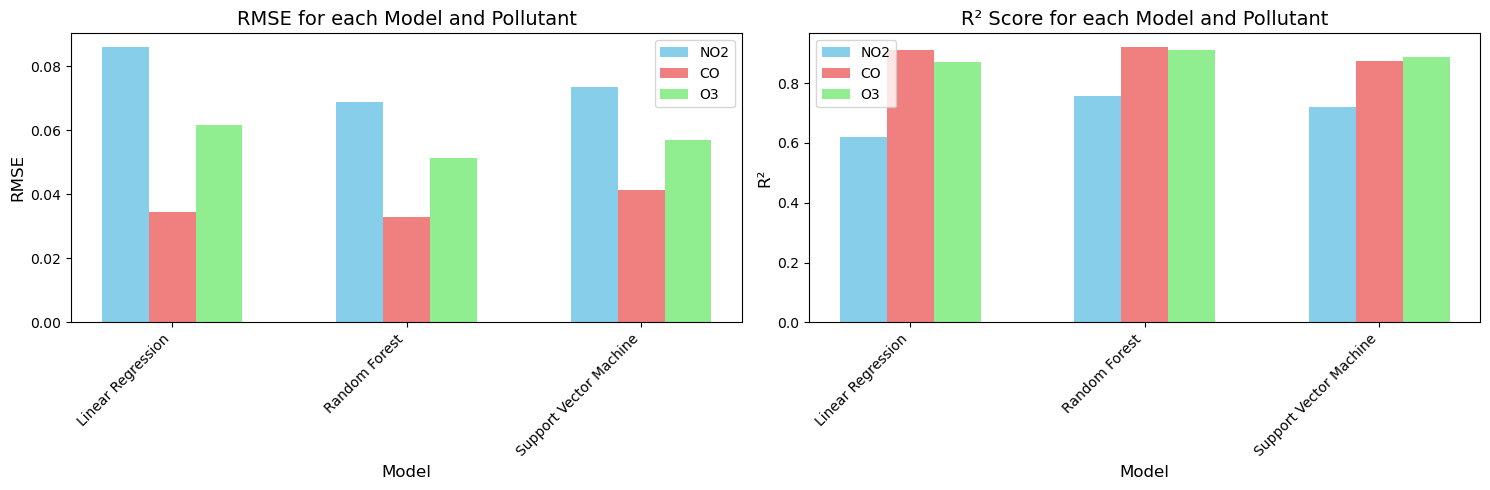

In [35]:
import matplotlib.pyplot as plt

# Assuming results_no2, results_co, and results_o3 are dictionaries as provided

pollutants = ['NO2', 'CO', 'O3']
models = ['Linear Regression', 'Random Forest', 'Support Vector Machine']
rmse_values = []
r2_values = []

for pollutant, results in zip(pollutants, [results_no2, results_co, results_o3]):
    for model in models:
        rmse_values.append(results[model]['RMSE'])
        r2_values.append(results[model]['R2'])


# Create the bar chart
bar_width = 0.2
index = np.arange(len(models))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))  # Adjust figure size for better spacing

ax1.bar(index, rmse_values[0:3], bar_width, label='NO2', color = 'skyblue')
ax1.bar(index + bar_width, rmse_values[3:6], bar_width, label='CO', color = 'lightcoral')
ax1.bar(index + 2 * bar_width, rmse_values[6:9], bar_width, label='O3', color = 'lightgreen')

ax1.set_xlabel('Model', fontsize=12)
ax1.set_ylabel('RMSE', fontsize=12)
ax1.set_title('RMSE for each Model and Pollutant', fontsize=14)
ax1.set_xticks(index + bar_width)
ax1.set_xticklabels(models, rotation=45, ha='right')
ax1.legend()


ax2.bar(index, r2_values[0:3], bar_width, label='NO2', color = 'skyblue')
ax2.bar(index + bar_width, r2_values[3:6], bar_width, label='CO', color = 'lightcoral')
ax2.bar(index + 2 * bar_width, r2_values[6:9], bar_width, label='O3', color = 'lightgreen')

ax2.set_xlabel('Model', fontsize=12)
ax2.set_ylabel('R²', fontsize=12)
ax2.set_title('R² Score for each Model and Pollutant', fontsize=14)
ax2.set_xticks(index + bar_width)
ax2.set_xticklabels(models, rotation=45, ha='right')
ax2.legend()


plt.tight_layout()
plt.show()


approche MultiOutPut


In [36]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features selected based on correlation > 0.5 with any of the targets
selected_features =['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'PT08.S4(NO2)']

# Prepare the dataset with selected features
X = dataset_best_normalized1[selected_features]
y = dataset_best_normalized1[['NO2(GT)', 'CO(GT)', 'PT08.S5(O3)']]  # Targets: NO2, CO, O3

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models to evaluate
models = [
    ('Random Forest', MultiOutputRegressor(RandomForestRegressor(random_state=42))),
    ('Gradient Boosting', MultiOutputRegressor(GradientBoostingRegressor(random_state=42))),
    ('Support Vector Machine', MultiOutputRegressor(SVR())),
    ('K-Nearest Neighbors', MultiOutputRegressor(KNeighborsRegressor())),
    ('ElasticNet', MultiOutputRegressor(ElasticNet(random_state=42))),
  
]

# Loop through each model and evaluate
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate RMSE and R² for each target
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Print the results for each model
    print(f"\n📊 Results for {model_name} prediction:")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")



📊 Results for Random Forest prediction:
RMSE: 0.049754358469094526
R²: 0.87950849861911

📊 Results for Gradient Boosting prediction:
RMSE: 0.054350266998199774
R²: 0.8580585183405084

📊 Results for Support Vector Machine prediction:
RMSE: 0.055486529159603004
R²: 0.8482274642730229

📊 Results for K-Nearest Neighbors prediction:
RMSE: 0.051880707076830325
R²: 0.8701637674743367

📊 Results for ElasticNet prediction:
RMSE: 0.14381011794093373
R²: -0.0002583617300645121


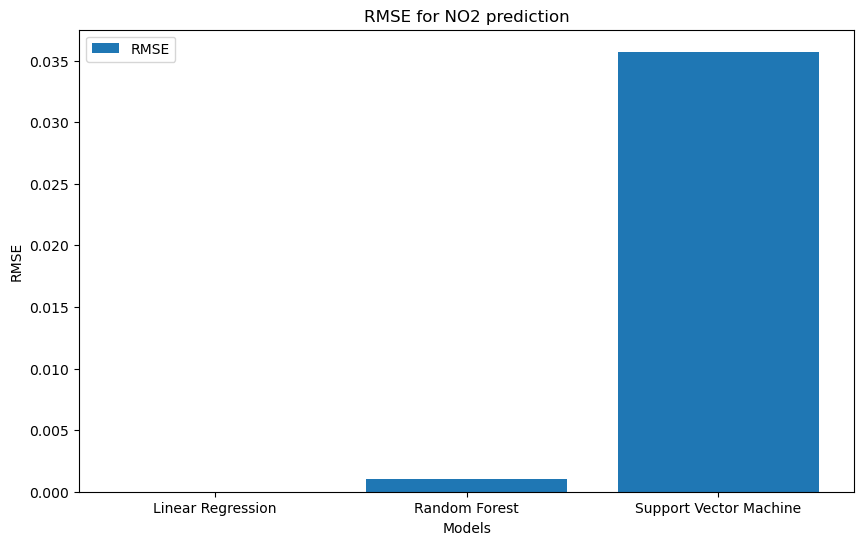

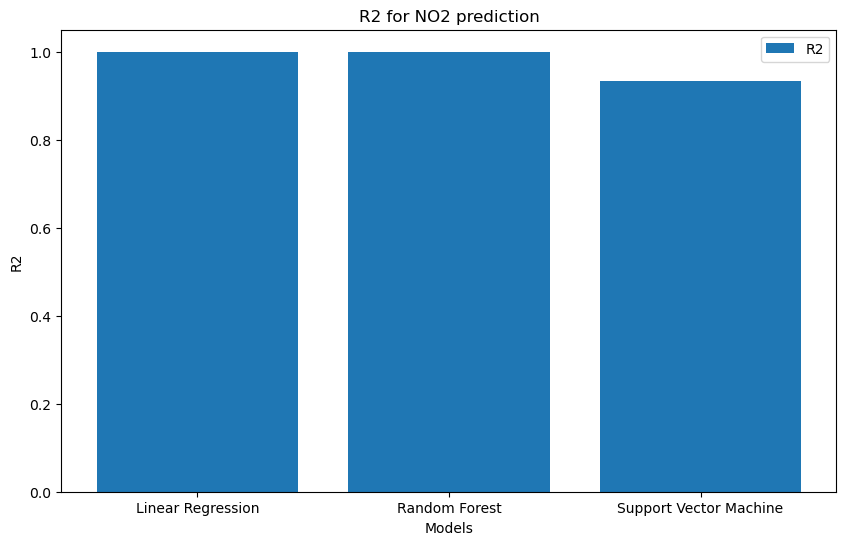

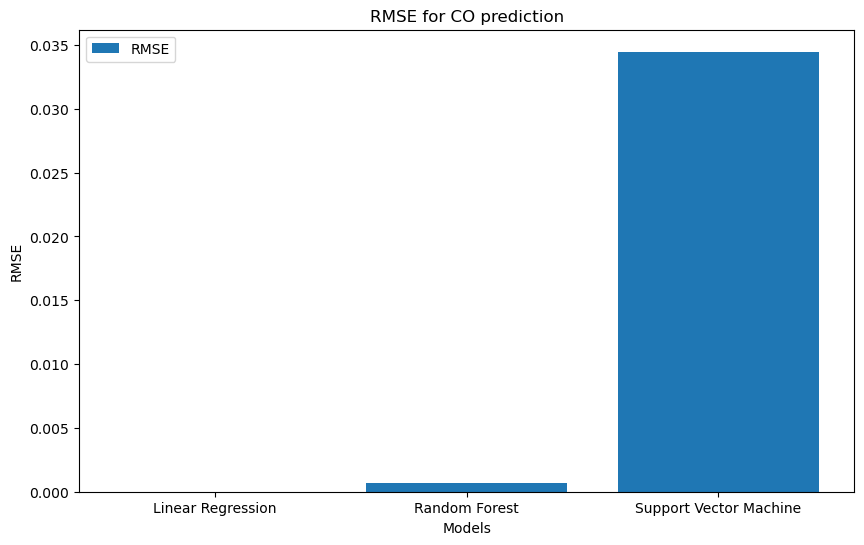

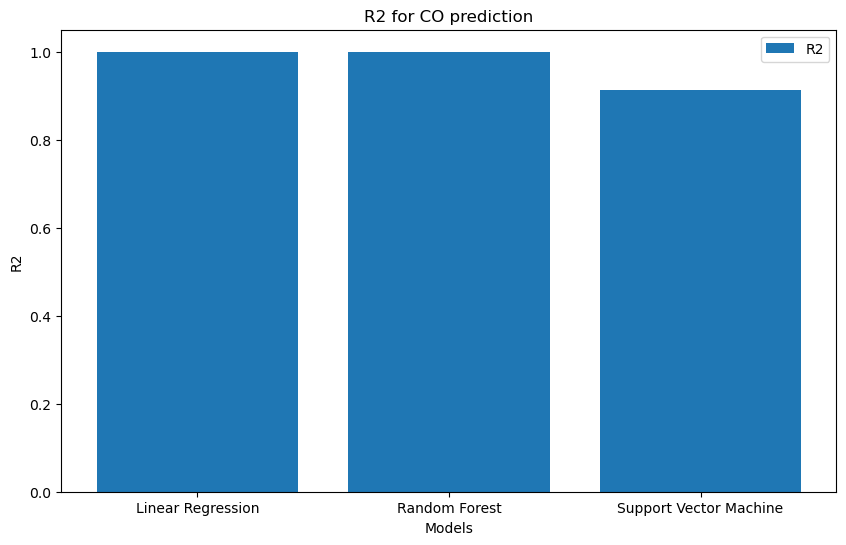

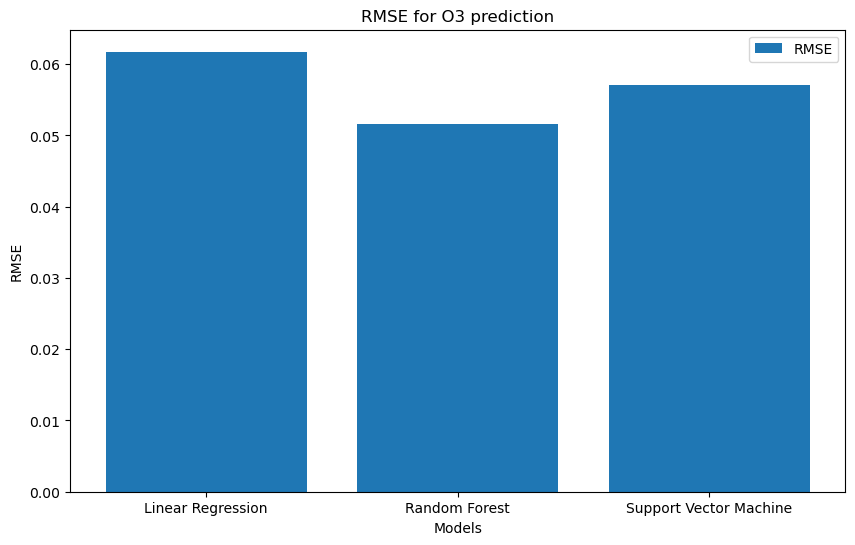

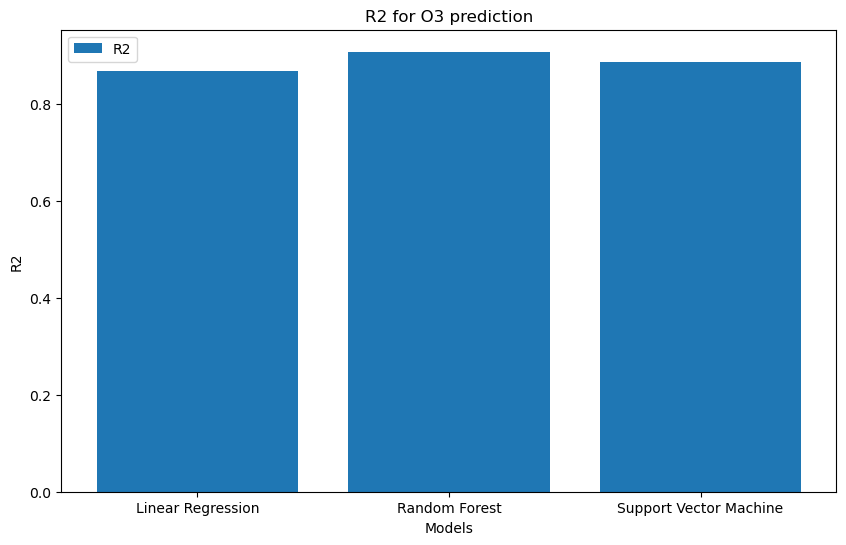

In [37]:

results_no2 = {'Linear Regression': {'RMSE': np.float64(1.1310952900652686e-16), 'R2': 1.0}, 'Random Forest': {'RMSE': np.float64(0.001043438058763665), 'R2': 0.9999439773077338}, 'Support Vector Machine': {'RMSE': np.float64(0.03571732080929776), 'R2': 0.9343570064269293}}
results_co = {'Linear Regression': {'RMSE': np.float64(1.7229518551750125e-16), 'R2': 1.0}, 'Random Forest': {'RMSE': np.float64(0.0006505433049534394), 'R2': 0.9999687901597335}, 'Support Vector Machine': {'RMSE': np.float64(0.03446873139907662), 'R2': 0.9123827290234089}}
results_o3 = {'Linear Regression': {'RMSE': np.float64(0.061746939995755035), 'R2': 0.8686836804269213}, 'Random Forest': {'RMSE': np.float64(0.05156797896130562), 'R2': 0.9084100031597904}, 'Support Vector Machine': {'RMSE': np.float64(0.05710991688142313), 'R2': 0.887666089319911}}

pollutants = ['NO2', 'CO', 'O3']
results = [results_no2, results_co, results_o3]

for i, pollutant in enumerate(pollutants):
    plt.figure(figsize=(10, 6))
    models = list(results[i].keys())
    rmse_values = [results[i][model]['RMSE'] for model in models]
    r2_values = [results[i][model]['R2'] for model in models]

    plt.bar(models, rmse_values, label='RMSE')
    plt.xlabel("Models")
    plt.ylabel("RMSE")
    plt.title(f"RMSE for {pollutant} prediction")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.bar(models, r2_values, label='R2')
    plt.xlabel("Models")
    plt.ylabel("R2")
    plt.title(f"R2 for {pollutant} prediction")
    plt.legend()
    plt.show()


In [38]:
# target_no2 = 'NO2(GT)'

# X_no2 = dataset_best_normalized1[features_no2]
# y_no2 = dataset_best_normalized1[target_no2]

# X_train_no2, X_test_no2, y_train_no2, y_test_no2 = train_test_split(X_no2, y_no2, test_size=0.2, random_state=42)

# model_no2 = RandomForestRegressor(random_state=42)
# model_no2.fit(X_train_no2, y_train_no2)

# y_pred_no2 = model_no2.predict(X_test_no2)
# print("\n🔹 Modèle NO2(GT) - RandomForest")
# print("RMSE :", np.sqrt(mean_squared_error(y_test_no2, y_pred_no2)))
# print("R² :", r2_score(y_test_no2, y_pred_no2))

# joblib.dump(model_no2, 'model_NO2.pkl')


In [39]:
# target_co = 'CO(GT)'

# X_co = dataset_best_normalized1[features_co]
# y_co = dataset_best_normalized1[target_co]

# X_train_co, X_test_co, y_train_co, y_test_co = train_test_split(X_co, y_co, test_size=0.2, random_state=42)

# model_co = RandomForestRegressor(random_state=42)
# model_co.fit(X_train_co, y_train_co)

# y_pred_co = model_co.predict(X_test_co)
# print("\n🔹 Modèle CO(GT) - RandomForest")
# print("RMSE :", np.sqrt(mean_squared_error(y_test_co, y_pred_co)))
# print("R² :", r2_score(y_test_co, y_pred_co))

# joblib.dump(model_co, 'model_CO.pkl')


In [40]:

# target_o3 = 'PT08.S5(O3)'

# X_o3 = dataset_best_normalized1[features_o3]
# y_o3 = dataset_best_normalized1[target_o3]

# X_train_o3, X_test_o3, y_train_o3, y_test_o3 = train_test_split(X_o3, y_o3, test_size=0.2, random_state=42)

# model_o3 = xgb.XGBRegressor(random_state=42, n_estimators=100)
# model_o3.fit(X_train_o3, y_train_o3)

# y_pred_o3 = model_o3.predict(X_test_o3)
# print("\n🔹 Modèle O3 - XGBoost")
# print("RMSE :", np.sqrt(mean_squared_error(y_test_o3, y_pred_o3)))
# print("R² :", r2_score(y_test_o3, y_pred_o3))

# joblib.dump(model_o3, 'model_O3.pkl')


approche **2*

In [41]:
import pandas as pd
import numpy as np

# Remplacer les -200 par NaN
dataset = dataset.replace(-200, np.nan)

# Remplir les valeurs manquantes par la moyenne dans certaines colonnes numériques
dataset_approche2= dataset.fillna(dataset.mean())

# Pour les colonnes avec des données temporelles ou ordonnées, utiliser l'interpolation
dataset_approche2 = dataset_approche2.interpolate(method='linear')

# Affichage du dataset nettoyé
print(dataset_approche2.head())


   CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  \
0     2.6       1360.0      11.9         1046.0    166.0        1056.0   
1     2.0       1292.0       9.4          955.0    103.0        1174.0   
2     2.2       1402.0       9.0          939.0    131.0        1140.0   
3     2.2       1376.0       9.2          948.0    172.0        1092.0   
4     1.6       1272.0       6.5          836.0    131.0        1205.0   

   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH      AH  
0    113.0        1692.0       1268.0  13.6  48.9  0.7578  
1     92.0        1559.0        972.0  13.3  47.7  0.7255  
2    114.0        1555.0       1074.0  11.9  54.0  0.7502  
3    122.0        1584.0       1203.0  11.0  60.0  0.7867  
4    116.0        1490.0       1110.0  11.2  59.6  0.7888  


<Figure size 1500x1200 with 0 Axes>

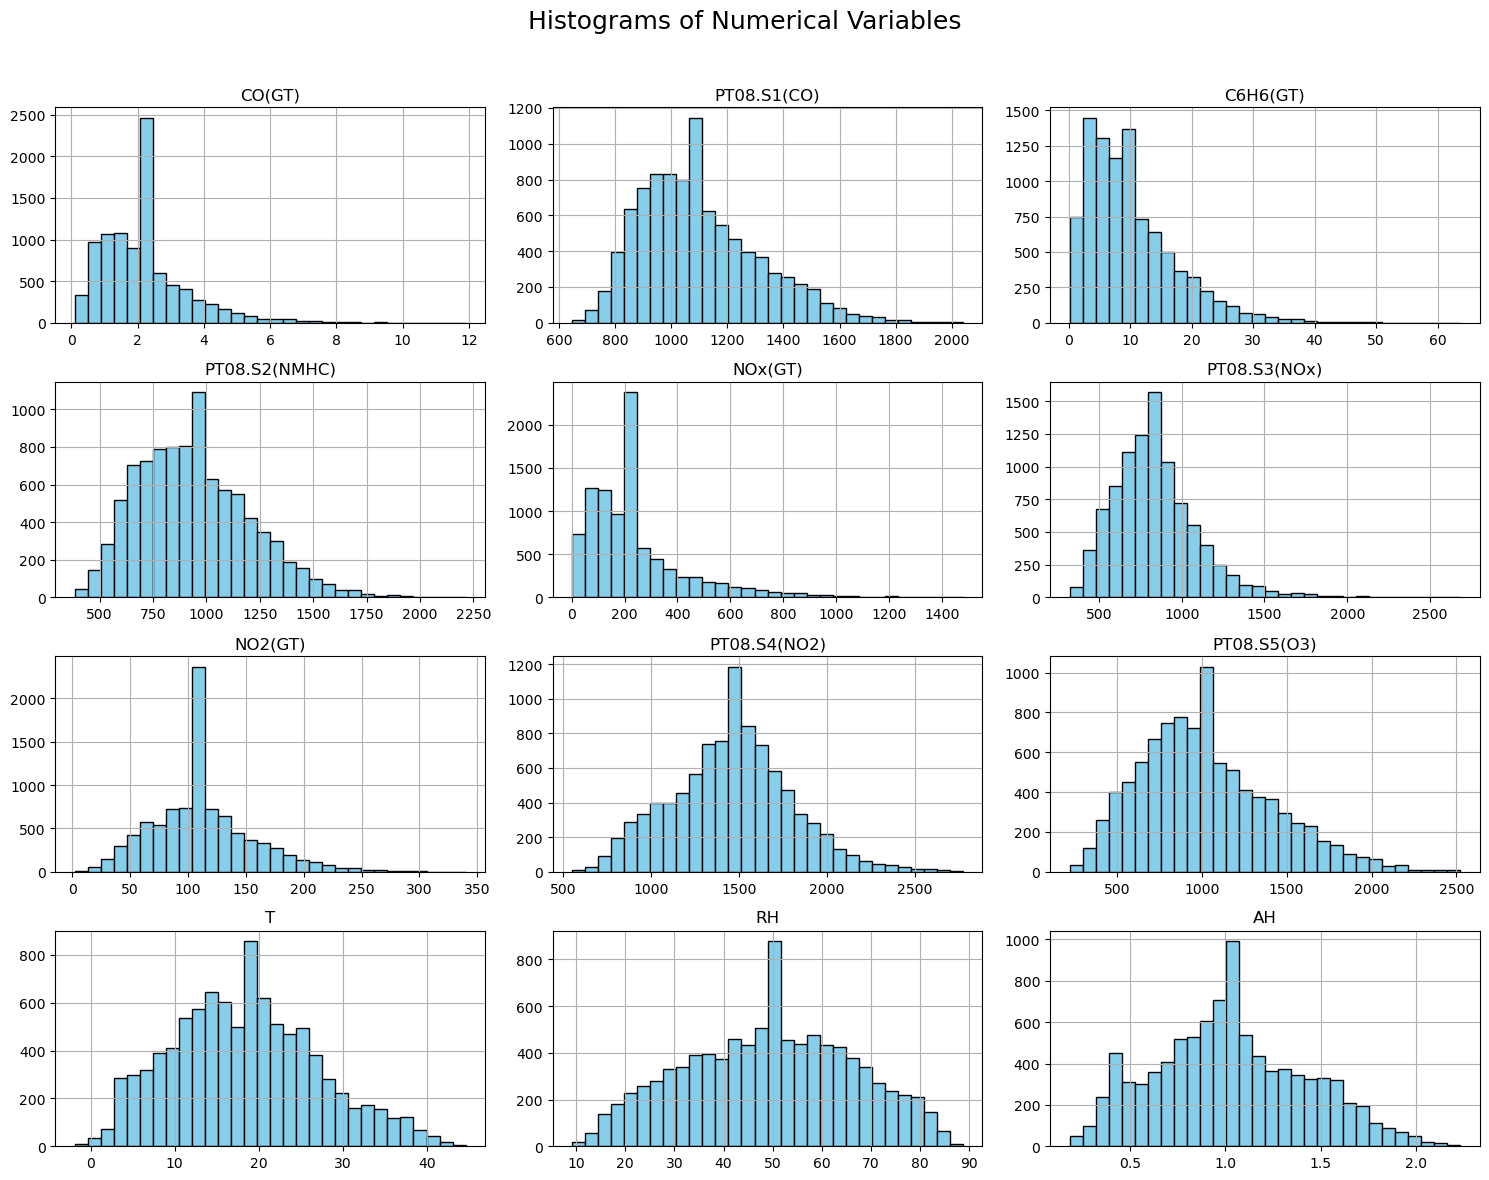

In [42]:
# Sélectionner uniquement les colonnes numériques du dataset nettoyé
dataset_approche2 = dataset_approche2.select_dtypes(include='number')

# Visualiser les histogrammes (facultatif)
plt.figure(figsize=(15, 12))
dataset_approche2.hist(bins=30, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Variables", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


<Figure size 1500x1200 with 0 Axes>

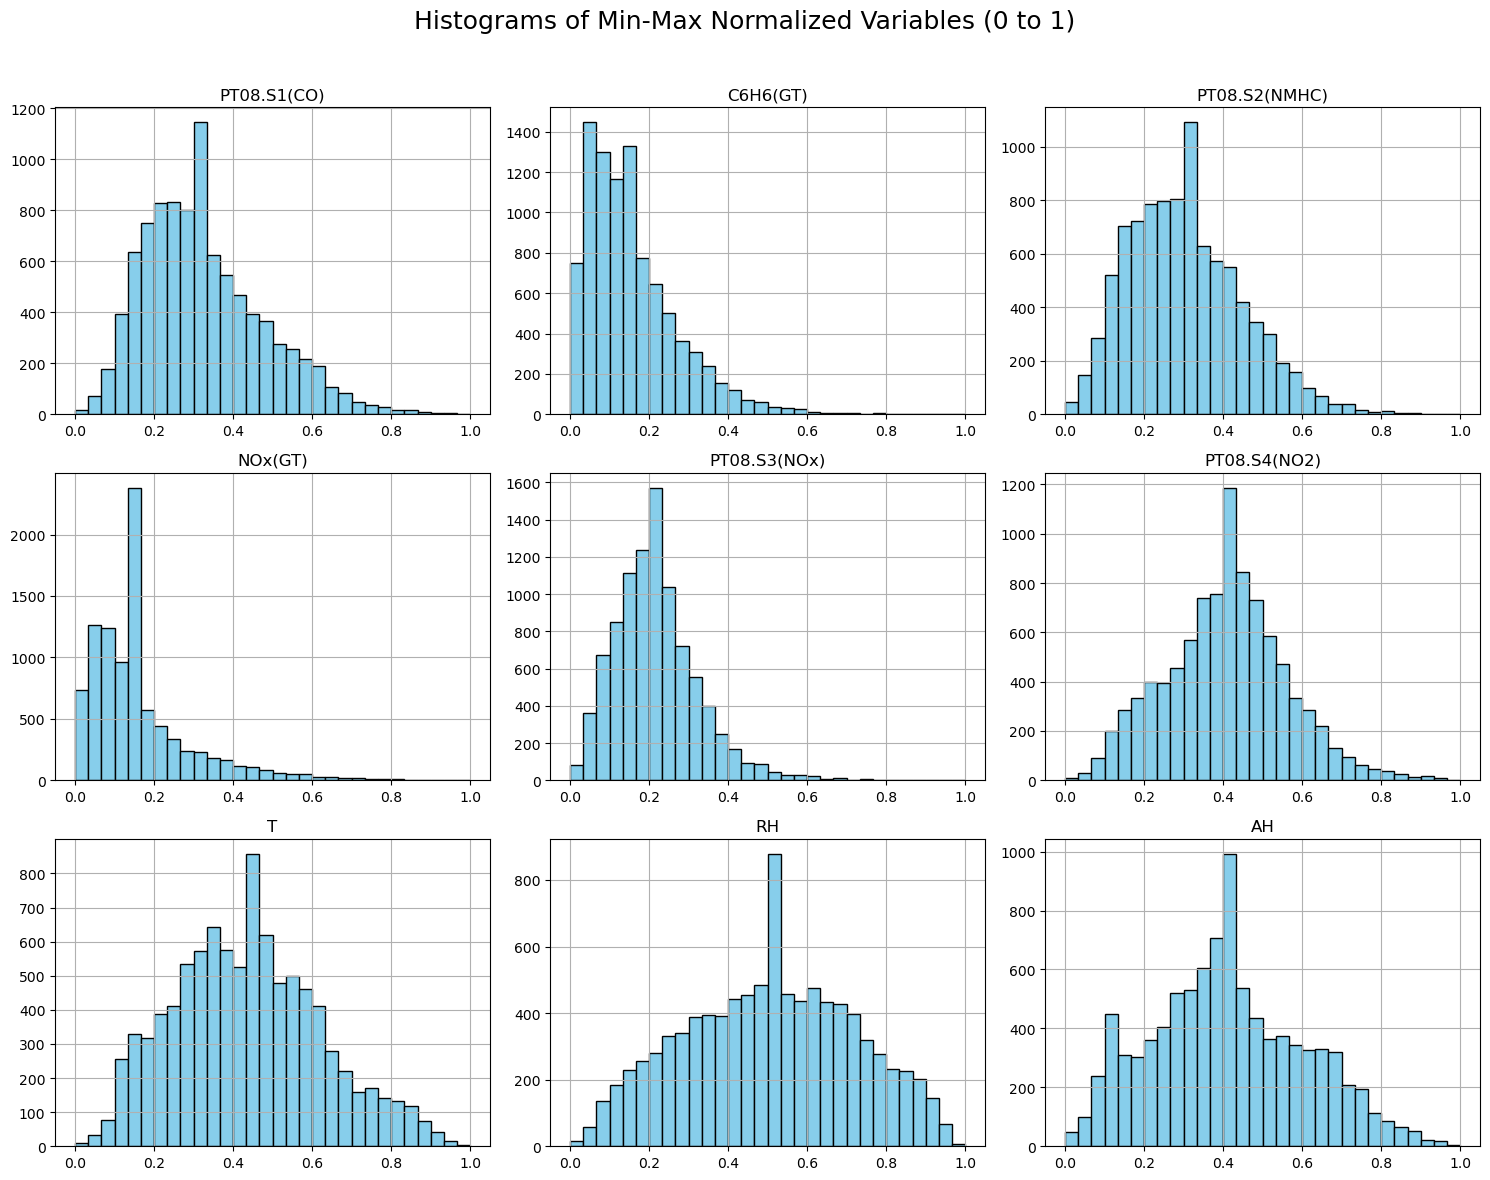

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
# Assuming dataset_approche2_num is your DataFrame and cols_to_ignore are defined

# 1. Garder seulement les colonnes numériques
dataset_approche2_num = dataset_approche2.select_dtypes(include='number')

# 2. Supprimer les colonnes à ignorer
cols_to_ignore = ['CO(GT)', 'NO2(GT)', 'PT08.S5(O3)']  # Updated column names
dataset_to_scale = dataset_approche2_num.drop(columns=cols_to_ignore, errors='ignore')

# 3. Appliquer la normalisation Min-Max
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(dataset_to_scale)

# 4. Créer un DataFrame normalisé
normalized_df = pd.DataFrame(normalized_data, columns=dataset_to_scale.columns, index=dataset_approche2.index)

# 5. Réintégrer les colonnes ignorées (non normalisées)
for col in cols_to_ignore:
    if col in dataset_approche2_num.columns:
        normalized_df[col] = dataset_approche2_num[col]

# 6. Afficher les histogrammes (uniquement des colonnes normalisées)
plt.figure(figsize=(15, 12))
normalized_df.drop(columns=cols_to_ignore, errors='ignore').hist(bins=30, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Min-Max Normalized Variables (0 to 1)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


1. Remplacer les -200 par NaN



In [44]:
dataset_approche2_num.interpolate(method='linear', inplace=True)


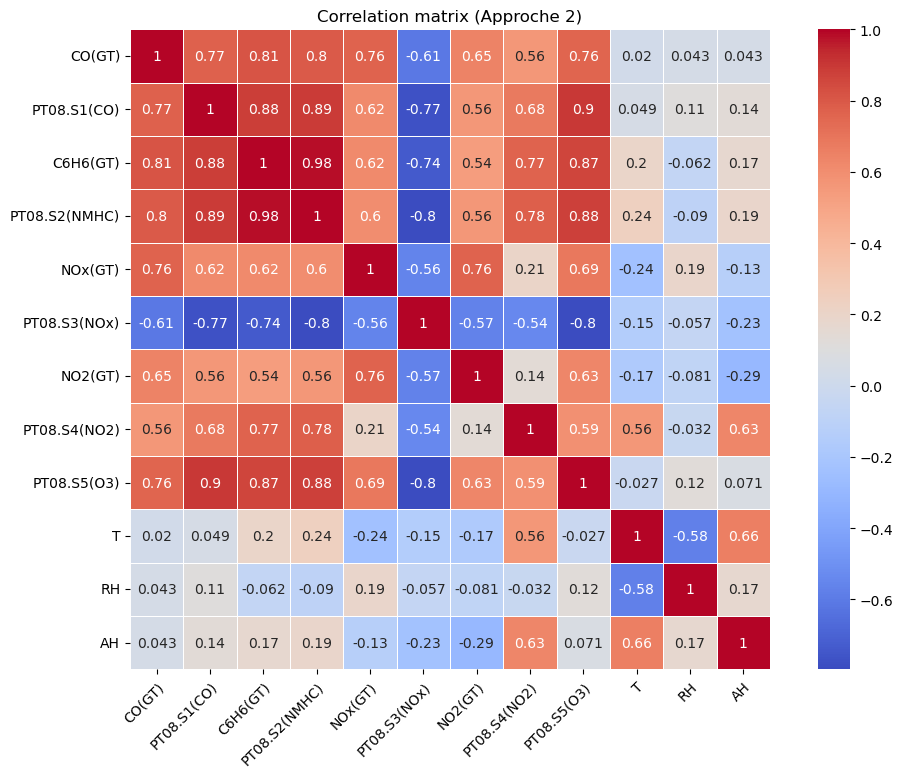

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Garder seulement les colonnes numériques
data_corr2 = dataset_approche2_num.select_dtypes(include='number')

# 2. Calcul de la matrice de corrélation
corr = data_corr2.corr(numeric_only=True)

# 3. Affichage avec heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, square=True)

# 4. Ajouter un titre
plt.title("Correlation matrix (Approche 2)")

# 5. Rotation et espacement des étiquettes
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.yticks(rotation=0)

# 6. Ajustement de l'espacement
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# 7. Affichage
plt.show()


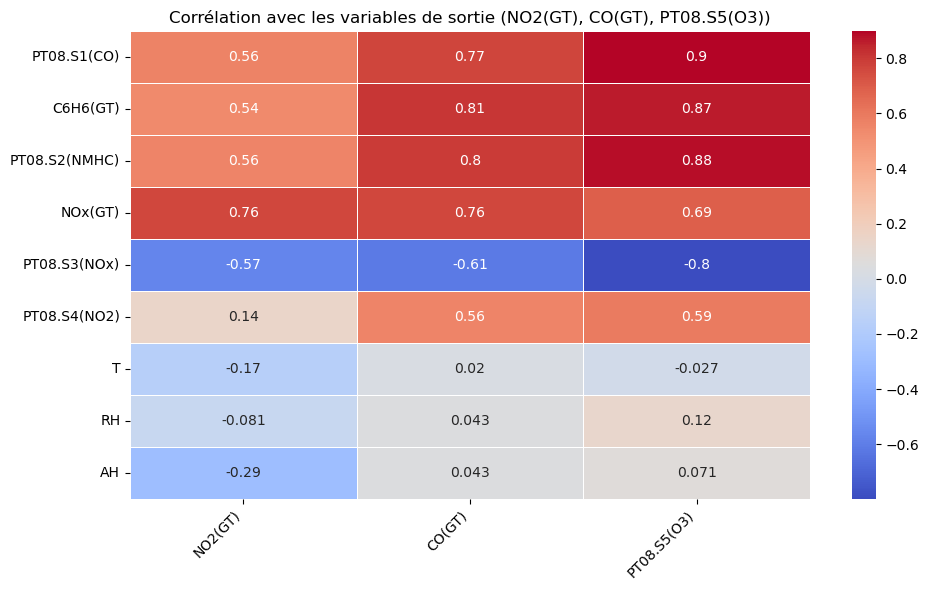

In [46]:
# Liste des variables de sortie
target_vars = ['NO2(GT)', 'CO(GT)', 'PT08.S5(O3)']

# Calcul de la matrice de corrélation sur les colonnes numériques
corr = dataset_approche2_num.corr(numeric_only=True)

# Extraction des corrélations avec les variables de sortie
corr_target = corr[target_vars].drop(index=target_vars, errors='ignore')  # Supprime les cibles des lignes

# Affichage avec heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_target, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title("Corrélation avec les variables de sortie (NO2(GT), CO(GT), PT08.S5(O3))")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [47]:
# Matrix de corrélation
corr = dataset_approche2_num.corr(numeric_only=True)

# Sélectionner les features qui ont une corrélation > 0.5 pour chaque cible
features_no2 = corr[abs(corr['NO2(GT)']) > 0.5].index.tolist()
features_co = corr[abs(corr['CO(GT)']) > 0.5].index.tolist()
features_o3 = corr[abs(corr['PT08.S5(O3)']) > 0.5].index.tolist()

# Enlever la cible elle-même des features sélectionnées
features_no2.remove('NO2(GT)')
features_co.remove('CO(GT)')
features_o3.remove('PT08.S5(O3)')

print("Features for NO2 prediction:", features_no2)
print("Features for CO prediction:", features_co)
print("Features for O3 prediction:", features_o3)



Features for NO2 prediction: ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'PT08.S5(O3)']
Features for CO prediction: ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
Features for O3 prediction: ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)']


2. Remplir les NaN par interpolation ou moyenne


Matrices de **corrélation**

**Sélection de variables corrélées**

In [48]:
# prompt: Remplis les valeurs manquantes du dataset en utilisant la moyenne pour les colonnes numériques,
#la valeur la plus fréquente pour les colonnes non numériques des features sélectionnées (features_co, features_o3, features_no2),
#puis vérifie qu’il ne reste plus de valeurs manquantes.

# Fill missing values for selected features
#for col in features_co + features_o3 + features_no2:
    #if data_cleaned[col].dtype == 'object':
        # Fill missing values with the most frequent value for non-numeric columns
    #    most_frequent = dataset[col].mode()[0]
     #   data_cleaned[col].fillna(most_frequent, inplace=True)
    #else:
        # Fill missing values with the mean for numeric columns
     #   mean_value = dataset[col].mean()
      #  data_cleaned[col].fillna(mean_value, inplace=True)

# Verify that there are no more missing values in the selected features
#print(dataset[features_co + features_o3 + features_no2].isnull().sum())


# Data Spliting

In [49]:
from sklearn.model_selection import train_test_split

# Définir les features pour chaque target (à adapter selon ton dataset)
features_co = ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
features_no2 =['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'PT08.S5(O3)']
features_o3 = ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)']




# Vérifie que les colonnes existent bien
def validate_features(features, df):
    return [col for col in features if col in df.columns]


features_no2 = validate_features(features_no2, dataset_approche2_num)
features_o3 = validate_features(features_o3, dataset_approche2_num)
features_co = validate_features(features_co, dataset_approche2_num)
# Fonction pour séparer les données en train et test pour chaque target
def split_data(target, features):
    X = dataset_approche2_num[features]  # Features
    y = dataset_approche2_num[target]    # Target
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [50]:
# Modeling each traget have model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Fonction pour tester plusieurs modèles
def test_models(X_train, X_test, y_train, y_test):
    models = {
        'Linear Regression': LinearRegression(),
        'Random Forest': RandomForestRegressor(),
        'Support Vector Machine': SVR()
    }

    results = {}

    for name, model in models.items():
        # Entraîner le modèle
        model.fit(X_train, y_train)

        # Prédictions
        y_pred = model.predict(X_test)

        # Calculer les métriques
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        # Stocker les résultats
        results[name] = {'RMSE': rmse, 'R2': r2}

    return results

 3. Choix des algorithmes **implémentés**

In [51]:
# Modèle pour NO2
X_train_no2, X_test_no2, y_train_no2, y_test_no2 = split_data('NO2(GT)', features_no2)
results_no2 = test_models(X_train_no2, X_test_no2, y_train_no2, y_test_no2)
print("\n Results for NO2 prediction:")
print(results_no2)

# Modèle pour CO
X_train_co, X_test_co, y_train_co, y_test_co = split_data('CO(GT)', features_co)
results_co = test_models(X_train_co, X_test_co, y_train_co, y_test_co)
print("\n Results for CO prediction:")
print(results_co)

# Modèle pour O3
X_train_o3, X_test_o3, y_train_o3, y_test_o3 = split_data('PT08.S5(O3)', features_o3)
results_o3 = test_models(X_train_o3, X_test_o3, y_train_o3, y_test_o3)
print("\n Results for O3 prediction:")
print(results_o3)




 Results for NO2 prediction:
{'Linear Regression': {'RMSE': 26.153690922838738, 'R2': 0.6362406458511903}, 'Random Forest': {'RMSE': 19.305940618276168, 'R2': 0.8017879158363024}, 'Support Vector Machine': {'RMSE': 25.433169914024763, 'R2': 0.6560073355825349}}

 Results for CO prediction:
{'Linear Regression': {'RMSE': 0.5919808362578877, 'R2': 0.8112419469725356}, 'Random Forest': {'RMSE': 0.5113888809390813, 'R2': 0.859138355161021}, 'Support Vector Machine': {'RMSE': 0.5749220756532858, 'R2': 0.8219638627512047}}

 Results for O3 prediction:
{'Linear Regression': {'RMSE': 140.67572480424477, 'R2': 0.8715083195861892}, 'Random Forest': {'RMSE': 117.58258107359843, 'R2': 0.9102317695219408}, 'Support Vector Machine': {'RMSE': 187.40556341996438, 'R2': 0.771964929150044}}


Choix des algorithmes implémentés
Interprétation des résultats et comparaison avec des travaux connexes

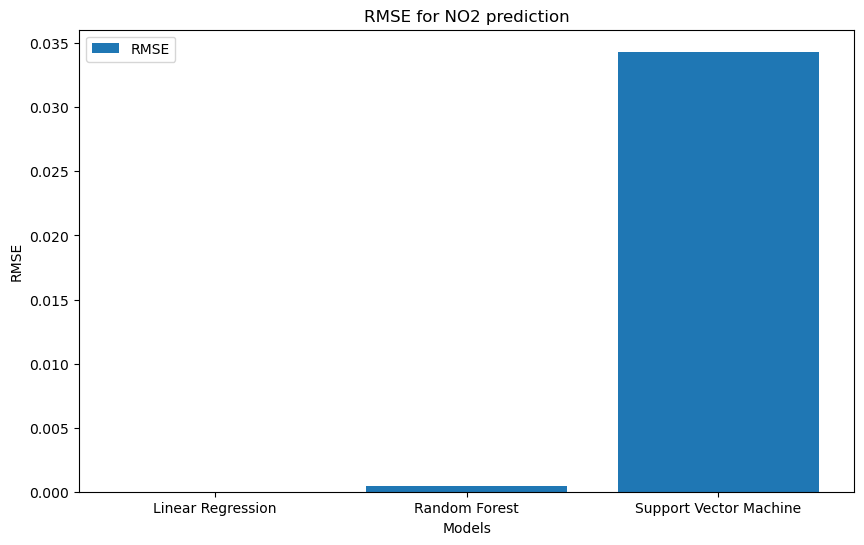

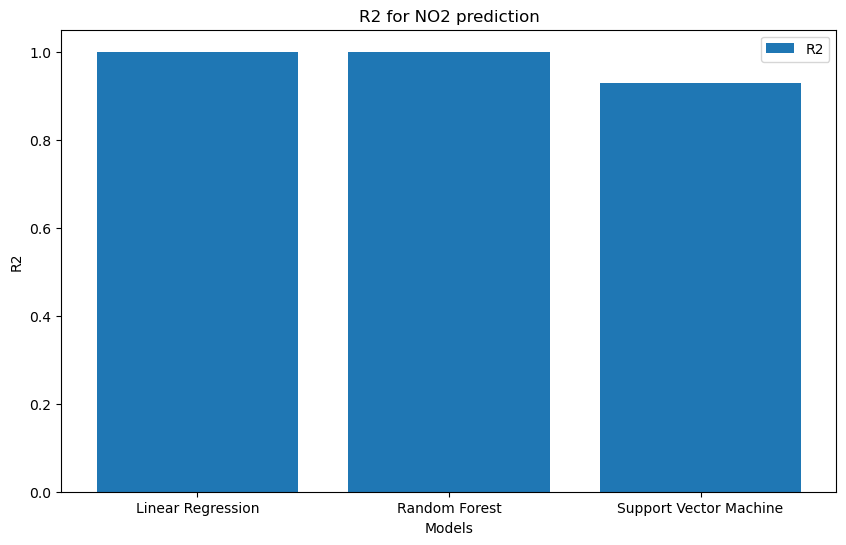

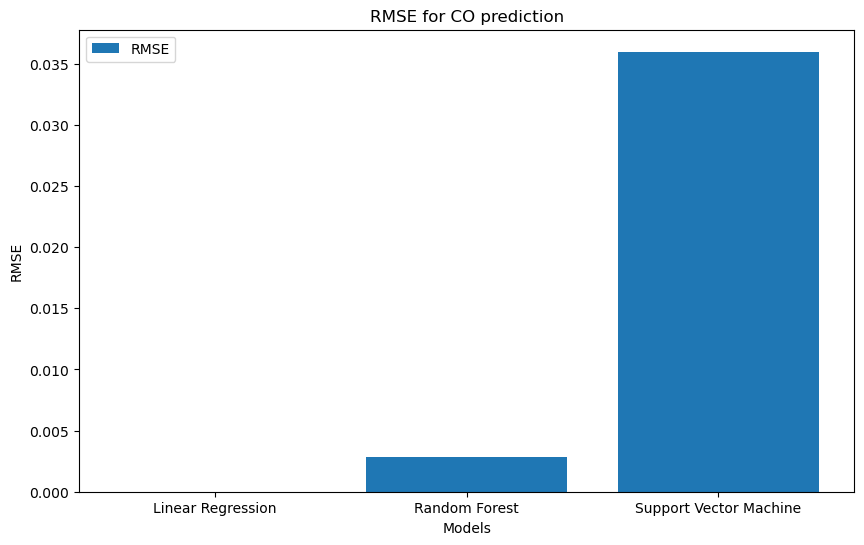

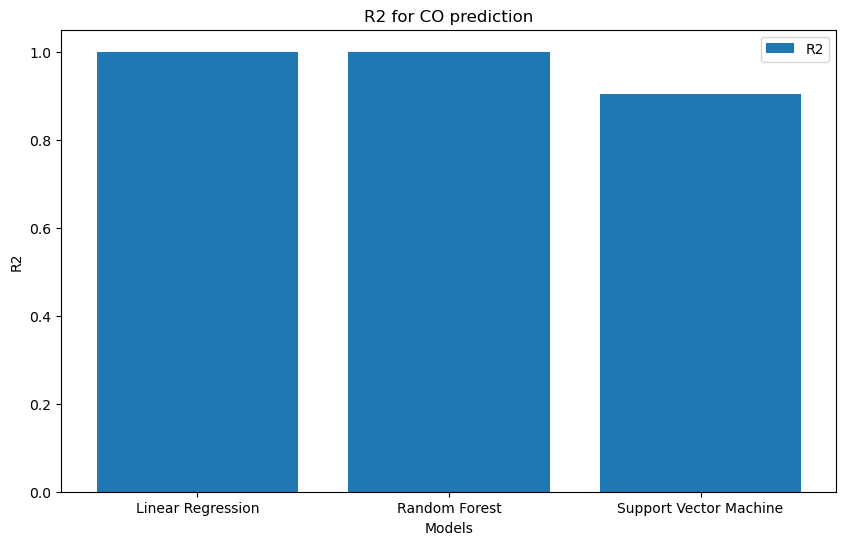

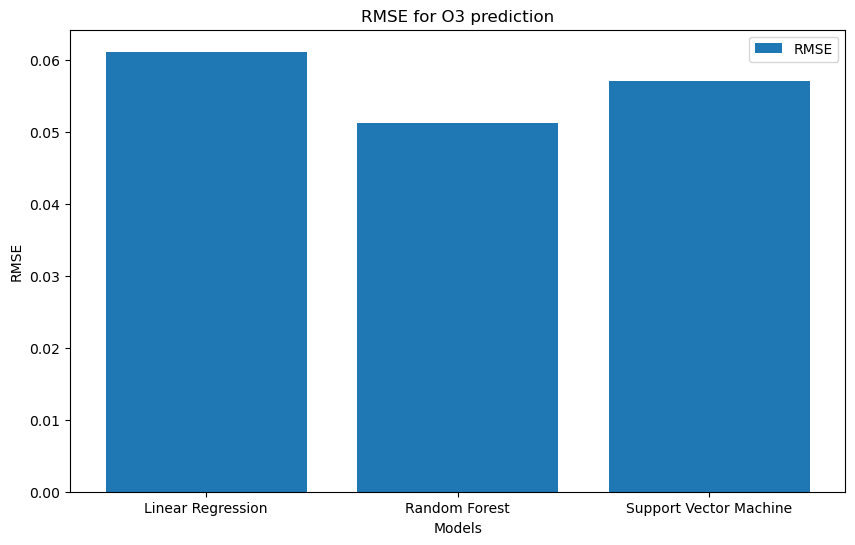

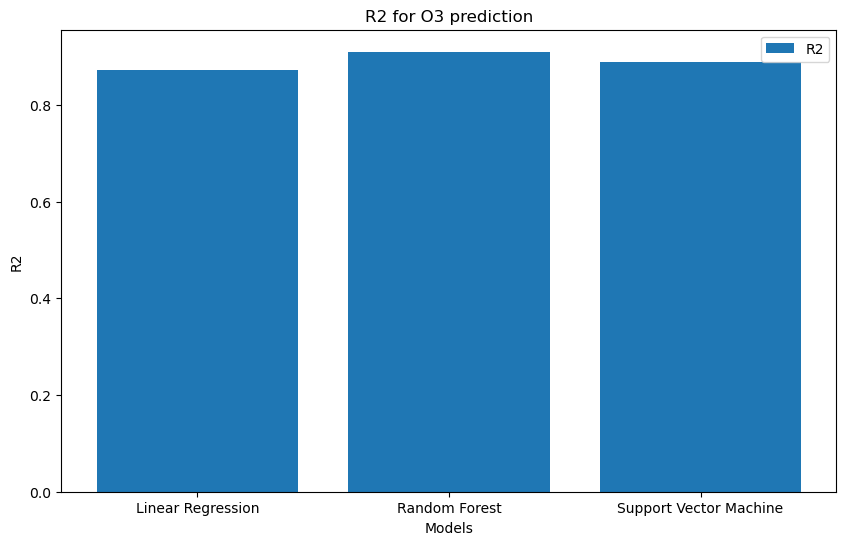

In [52]:

results_no2 = {'Linear Regression':{'RMSE': np.float64(1.0614896722255036e-16), 'R2': 1.0}, 'Random Forest': {'RMSE': np.float64(0.0004434739451256615), 'R2': 0.9999880513781924}, 'Support Vector Machine': {'RMSE': np.float64(0.03433781724117163), 'R2': 0.9283647194329457}}
results_co = {'Linear Regression': {'RMSE': np.float64(1.7507249856163135e-16), 'R2': 1.0}, 'Random Forest': {'RMSE': np.float64(0.0028706723371456897), 'R2': 0.9993819530656388}, 'Support Vector Machine': {'RMSE': np.float64(0.03599576275824366), 'R2': 0.9028244584558394}}
results_o3 = {'Linear Regression':{'RMSE': np.float64(0.06111021928941997), 'R2': 0.8715083195861892}, 'Random Forest': {'RMSE': np.float64(0.051218817450348786), 'R2': 0.9097376951810828}, 'Support Vector Machine': {'RMSE': np.float64(0.05709546253951426), 'R2': 0.8878367678263875}}

pollutants = ['NO2', 'CO', 'O3']
results = [results_no2, results_co, results_o3]

for i, pollutant in enumerate(pollutants):
    plt.figure(figsize=(10, 6))
    models = list(results[i].keys())
    rmse_values = [results[i][model]['RMSE'] for model in models]
    r2_values = [results[i][model]['R2'] for model in models]

    plt.bar(models, rmse_values, label='RMSE')
    plt.xlabel("Models")
    plt.ylabel("RMSE")
    plt.title(f"RMSE for {pollutant} prediction")
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.bar(models, r2_values, label='R2')
    plt.xlabel("Models")
    plt.ylabel("R2")
    plt.title(f"R2 for {pollutant} prediction")
    plt.legend()
    plt.show()


In [53]:
# enhane O3 model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet

# Fonction pour entraîner et évaluer plusieurs modèles
def evaluate_models(X_train, X_test, y_train, y_test):
    models = {
        'Gradient Boosting': GradientBoostingRegressor(),
        'Decision Tree': DecisionTreeRegressor(),
        'K-Nearest Neighbors': KNeighborsRegressor(),
        'ElasticNet': ElasticNet()
    }

    results = {}

    for name, model in models.items():
        # Entraîner le modèle
        model.fit(X_train, y_train)

        # Prédictions
        y_pred = model.predict(X_test)

        # Calculer RMSE et R²
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)

        # Stocker les résultats
        results[name] = {'RMSE': rmse, 'R2': r2}

    return results

# Appliquer les modèles pour prédire CO
results_all_models = evaluate_models(X_train_o3, X_test_o3, y_train_o3, y_test_o3)

# Afficher les résultats
print("\n📊 Results for CO prediction using different models:")
for model_name, result in results_all_models.items():
    print(f"{model_name}: RMSE = {result['RMSE']}, R2 = {result['R2']}")



📊 Results for CO prediction using different models:
Gradient Boosting: RMSE = 127.16932662810748, R2 = 0.8949970672170289
Decision Tree: RMSE = 166.7159638632054, R2 = 0.8195357997568113
K-Nearest Neighbors: RMSE = 124.91929480138451, R2 = 0.8986798710840668
ElasticNet: RMSE = 140.84890542229644, R2 = 0.871191762260795


# common model for (NO2, CO, O3)

In [54]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features selected based on correlation > 0.5 with any of the targets
selected_features = [
'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S4(NO2)', 'T', 'RH', 'AH','PT08.S3(NOx)'
]

# Prepare the dataset with selected features
X = dataset_approche2_num[selected_features]
y = dataset_approche2_num[['NO2(GT)', 'CO(GT)', 'PT08.S5(O3)']]  # Targets: NO2, CO, O3

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models to evaluate
models = [
    ('Random Forest', MultiOutputRegressor(RandomForestRegressor(random_state=42))),
    ('Gradient Boosting', MultiOutputRegressor(GradientBoostingRegressor(random_state=42))),
    ('Support Vector Machine', MultiOutputRegressor(SVR())),
    ('K-Nearest Neighbors', MultiOutputRegressor(KNeighborsRegressor())),
    ('ElasticNet', MultiOutputRegressor(ElasticNet(random_state=42))),
  
]

saved_models = models.copy()

# Loop through each model and evaluate
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate RMSE and R² for each target
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Print the results for each model
    print(f"\n📊 Results for {model_name} prediction:")
    print(f"RMSE: {rmse}")
    print(f"R²: {r2}")



📊 Results for Random Forest prediction:
RMSE: 60.56210337947007
R²: 0.8946961838757713

📊 Results for Gradient Boosting prediction:
RMSE: 67.00454920561678
R²: 0.8708803298251051

📊 Results for Support Vector Machine prediction:
RMSE: 110.42161131583278
R²: 0.7533093121688436

📊 Results for K-Nearest Neighbors prediction:
RMSE: 70.83778025038505
R²: 0.8613533095135614

📊 Results for ElasticNet prediction:
RMSE: 78.25801316178715
R²: 0.803453901469887
